# Exploration of NY Police Salaries 2014 - 2019
Notebook Author: Mitchell Jones 

This notebook is intended as a exploration of various statistics and comparisons surrounding NY Police Officer & Police Department salaries from the years 2014 - 2019. Given recent events and discourse on social media platforms like Twitter, I found it pertinent to explore these statistics with the aim of answering various questions, including:

How are Police Officers paid differently from other city employees?
<br>What departments of the city are paid the most?
<br>Do Police Officers receive Overtime Pay at higher rates, or as a percentage of their salary?

Additional questions may include salaries for Police Department Employees, rather than just Police officers.

Source Data can be found at: https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e


# Import Statements

In [156]:
# Import Statements - Data Handling
import os
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
# Set working directory
os.chdir('/Users/user1/Downloads')
# Import File
filename = 'Citywide_Payroll_Data__Fiscal_Year_.csv'
payroll = pd.read_csv(filename)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Basic Exploration

In [158]:
# Display Initial Statistics - Check Head of Data
payroll.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABA'AHMID,RAHASHEEM,E,07/14/2003,MANHATTAN,COMMUNITY ASSOCIATE,ACTIVE,47678.0,per Annum,1830.00,47166.03,2.25,57.28,0.0
1,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABENSUR,MARGARET,NaN,06/12/1995,MANHATTAN,ADMINISTRATIVE ACCOUNTANT,ACTIVE,119959.0,per Annum,1831.00,119042.50,0.00,0.00,0.0
2,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABOUNAOUM,ANDREA,L,10/11/2011,MANHATTAN,COMMUNITY ASSOCIATE,ON LEAVE,39966.0,per Annum,1181.68,27452.62,1.00,21.34,33.0
3,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABRAHAM,JONATHAN,J,12/01/2014,MANHATTAN,COMPUTER SYSTEMS MANAGER,ACTIVE,116000.0,per Annum,1831.00,115104.57,0.00,0.00,0.0
4,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABRAMS,JOSEPH,NaN,05/21/2015,MANHATTAN,COLLEGE AIDE,CEASED,1.0,per Hour,0.00,3500.00,0.00,0.00,0.0


In [159]:
# Describe Numeric Columns
payroll.describe()

,Fiscal Year,Payroll Number,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,3.333080e+06,1.587640e+06,3.333080e+06,3.333080e+06,3.333080e+06,3.333080e+06,3.333080e+06,3.333080e+06
mean,2.016551e+03,5.788984e+02,4.245116e+04,6.685378e+02,4.173166e+04,5.872698e+01,3.255362e+03,2.094629e+03
std,1.704581e+00,2.980495e+02,4.089202e+04,8.855774e+02,3.869131e+04,1.463332e+02,8.867136e+03,5.057170e+03
min,2.014000e+03,2.000000e+00,1.000000e-02,-7.304300e+02,-7.622305e+04,-2.090000e+02,-2.649388e+04,-2.815950e+05
25%,2.015000e+03,3.000000e+02,3.318000e+01,0.000000e+00,3.908155e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.017000e+03,7.420000e+02,4.107900e+04,0.000000e+00,3.582054e+04,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.018000e+03,7.470000e+02,7.648800e+04,1.825000e+03,7.320607e+04,1.750000e+00,1.893225e+02,1.105633e+03
max,2.019000e+03,9.960000e+02,3.527630e+05,4.171430e+03,6.723089e+05,3.347500e+03,2.373897e+05,1.003558e+05


In [160]:
# Check DataTypes
payroll.dtypes

Fiscal Year                     int64
Payroll Number                float64
Agency Name                    object
Last Name                      object
First Name                     object
Mid Init                       object
Agency Start Date              object
Work Location Borough          object
Title Description              object
Leave Status as of June 30     object
Base Salary                   float64
Pay Basis                      object
Regular Hours                 float64
Regular Gross Paid            float64
OT Hours                      float64
Total OT Paid                 float64
Total Other Pay               float64
dtype: object

In [161]:
# Lets convert Fiscal Year and Agency Start Date to datetime objects later
# Check Number of Unique Values Per Column
payroll.nunique()

Fiscal Year                         6
Payroll Number                    157
Agency Name                       165
Last Name                      151345
First Name                      84267
Mid Init                           43
Agency Start Date               14621
Work Location Borough              22
Title Description                1761
Leave Status as of June 30          5
Base Salary                     89793
Pay Basis                           4
Regular Hours                   80637
Regular Gross Paid            1613980
OT Hours                        47944
Total OT Paid                  706450
Total Other Pay                659237
dtype: int64

In [162]:
# Number of Unique Payroll Numbers - why are there any in this file?
# Number of Nulls per Column
payroll.isnull().sum()

Fiscal Year                         0
Payroll Number                1745440
Agency Name                         0
Last Name                        1677
First Name                       1698
Mid Init                      1355564
Agency Start Date                   0
Work Location Borough          506223
Title Description                  78
Leave Status as of June 30          0
Base Salary                         0
Pay Basis                           0
Regular Hours                       0
Regular Gross Paid                  0
OT Hours                            0
Total OT Paid                       0
Total Other Pay                     0
dtype: int64

In [163]:
# Columns to Investigate NaN's in:
# Payroll Number, First / Last Name / Middle Initial, Work Location, Title Description

# Data Preparation
To-Do List:
<br>Investigate Unique Values of Payroll Numbers
<br>Convert Fiscal Year and Agency Start Date to Dt Objects
<br>Address / Fill NaNs

In [164]:
# Investigate Unique Values of Payroll Number
payroll['Payroll Number'].unique()

array([ nan,  15.,  33.,   2.,   3.,   4.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  17.,  19.,  21.,  25.,  30.,  32.,  41.,  54.,  57.,
        67.,  69., 102., 210., 300.,  71.,  72.,  73., 101., 103., 125.,
       126., 127., 130., 131., 132., 133., 134., 136., 138., 156., 185.,
       202., 214., 226., 256., 261., 312., 313., 341., 342., 343., 344.,
       345., 346., 347., 348., 349., 350., 351., 352., 381., 382., 383.,
       384., 385., 386., 387., 388., 389., 390., 391., 392., 431., 432.,
       433., 434., 435., 436., 437., 438., 439., 440., 441., 442., 443.,
       444., 462., 463., 464., 465., 466., 468., 469., 740., 742., 470.,
       471., 472., 473., 474., 475., 476., 477., 478., 479., 480., 481.,
       482., 483., 484., 485., 486., 487., 488., 491., 492., 493., 744.,
       745., 746., 747., 781., 801., 806., 816., 810., 820., 827., 826.,
       846., 996., 831., 836., 841., 850., 858., 860., 866., 868., 941.,
       942., 943., 944., 945.,  63.,  82., 257., 46

In [165]:
# Upon further examination, Data Dictionary says that Payroll Number is just related to Agency that Employee works for
# No need to address this

# Convert Agency Start Date to Dt Objects
payroll['Agency Start Date'] = pd.to_datetime(payroll['Agency Start Date'], errors = 'coerce')
payroll['Fiscal Year'] = pd.to_datetime(payroll['Fiscal Year'], format = '%Y')
payroll.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2016-01-01,NaN,DISTRICT ATTORNEY-MANHATTAN,ABA'AHMID,RAHASHEEM,E,2003-07-14,MANHATTAN,COMMUNITY ASSOCIATE,ACTIVE,47678.0,per Annum,1830.00,47166.03,2.25,57.28,0.0
1,2016-01-01,NaN,DISTRICT ATTORNEY-MANHATTAN,ABENSUR,MARGARET,NaN,1995-06-12,MANHATTAN,ADMINISTRATIVE ACCOUNTANT,ACTIVE,119959.0,per Annum,1831.00,119042.50,0.00,0.00,0.0
2,2016-01-01,NaN,DISTRICT ATTORNEY-MANHATTAN,ABOUNAOUM,ANDREA,L,2011-10-11,MANHATTAN,COMMUNITY ASSOCIATE,ON LEAVE,39966.0,per Annum,1181.68,27452.62,1.00,21.34,33.0
3,2016-01-01,NaN,DISTRICT ATTORNEY-MANHATTAN,ABRAHAM,JONATHAN,J,2014-12-01,MANHATTAN,COMPUTER SYSTEMS MANAGER,ACTIVE,116000.0,per Annum,1831.00,115104.57,0.00,0.00,0.0
4,2016-01-01,NaN,DISTRICT ATTORNEY-MANHATTAN,ABRAMS,JOSEPH,NaN,2015-05-21,MANHATTAN,COLLEGE AIDE,CEASED,1.0,per Hour,0.00,3500.00,0.00,0.00,0.0


In [166]:
# Address NaN's
# Which Jobs Have the Most Missing First or Last Names?
payroll[payroll['First Name'].isnull() | payroll['Last Name'].isnull()]['Title Description'].value_counts()[:10]

SENIOR RACKETS INVESTIGATOR                               557
SENIOR RACKETS INVESTIGATOR - START >4-24-08 NO ABC       294
SUPERVISING RACKETS INVESTIGATOR                          224
RACKETS INVESTIGATOR                                      211
RACKETS INVESTIGATOR - START >4-24-08 NO ABC              158
SUPERVISING RACKETS INVESTIGATOR START >4-24-08 NO ABC    118
ASSISTANT CHIEF RACKET INVESTIGATOR                        28
CHIEF RACKETS INVESTIGATOR                                 17
ELECTION WORKER                                             8
CHIEF RACKETS  INVESTIGATOR                                 7
Name: Title Description, dtype: int64

In [167]:
# Looks like most Missing Names can be attributed to Rackets Investigators
# What Agencies do Racket Investigators work for?
payroll[payroll['Title Description'].str.contains("RACKETS INVESTIGATOR", na = False)]['Agency Name'].value_counts()

DISTRICT ATTORNEY KINGS COUNTY    483
DISTRICT ATTORNEY-MANHATTAN       452
DISTRICT ATTORNEY QNS COUNTY      354
BRONX DISTRICT ATTORNEY           292
DISTRICT ATTORNEY-SPECIAL NARC    148
Kings DA                           89
Manhattan DA                       71
Queens DA                          58
Bronx DA                           45
Spec Narcs-DA                      25
Name: Agency Name, dtype: int64

In [168]:
# All Racket Investigators work for some District Attorney
# Even though they are usually former NYPD, this is outside of our scope of interest

# Lets look at a sample of missing Title Descriptions
payroll[payroll['Title Description'].isnull()].head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
129915,2016-01-01,NaN,COMMUNITY COLLEGE (QUEENSBORO),COMMISSO,SALVATORE,NaN,2014-01-03,QUEENS,NaN,ACTIVE,52884.00,per Annum,2091.42,49748.88,319.25,11861.34,199.41
130484,2016-01-01,NaN,COMMUNITY COLLEGE (QUEENSBORO),GREEN,BRUCE,S,2005-11-01,QUEENS,NaN,ACTIVE,56072.00,per Annum,2091.42,56624.79,505.00,20462.83,533.72
196326,2016-01-01,NaN,DEPT OF ED HRLY SUPPORT STAFF,AVERSA,CARMELA,T,2011-07-01,MANHATTAN,NaN,CEASED,14.39,per Hour,0.00,1000.00,0.00,0.00,0.00
210630,2016-01-01,NaN,DEPT OF ED HRLY SUPPORT STAFF,ORTIZ,A,NaN,1999-12-31,MANHATTAN,NaN,ACTIVE,13.17,per Hour,0.00,11562.37,0.00,1621.92,0.00
213234,2016-01-01,NaN,DEPT OF ED HRLY SUPPORT STAFF,RIVERS,JANET,C,2011-07-01,MANHATTAN,NaN,CEASED,14.39,per Hour,0.00,625.00,0.00,0.00,0.00


In [169]:
# What Agencies Have the most NaN Title Descriptions?
payroll[payroll['Title Description'].isnull()]['Agency Name'].value_counts()

DISTRICT ATTORNEY RICHMOND COU    38
DEPT OF ED HRLY SUPPORT STAFF     14
DEPT OF ED PARA PROFESSIONALS     14
COMMUNITY COLLEGE (QUEENSBORO)    12
Name: Agency Name, dtype: int64

In [170]:
# Not relevant to Police Data, but interesting that some positions have no descriptions
# At this point, we're done exploring NaNs / Outliers and won't be doing any transformations

# Data Manipulation
All Police Officers belong to the Police Department but not all Police Department Employees are Police Officers

In [171]:
# Lets Capitalize All Agency Names and Title Descriptions for Normalization
payroll['Agency Name'] = payroll['Agency Name'].str.upper()
payroll['Title Description'] = payroll['Title Description'].str.upper()

In [172]:
payroll['Police Officer'] = payroll['Title Description'] == 'POLICE OFFICER'

# Visualizations and Comparisons

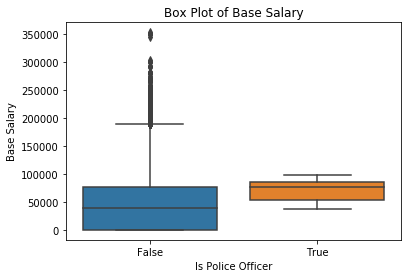

In [173]:
# How does the distribution of Base Salary differ between Police and Non-Police?
sns.boxplot(x = 'Police Officer', y = 'Base Salary', data = payroll)
plt.title('Box Plot of Base Salary')
plt.xlabel('Is Police Officer')
plt.show()

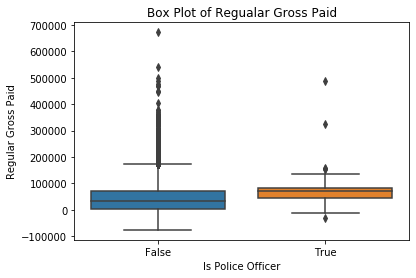

In [174]:
# A Police Officer in the 25% percentile of the department is assigned a Base salary more than the median NYC employee
# Many Outliers on the Non-Police Side
# Is Regular Gross Paid a better statistic, since real pay deviates from assigned pay?
sns.boxplot(x = 'Police Officer', y = 'Regular Gross Paid', data = payroll)
plt.title('Box Plot of Regualar Gross Paid')
plt.xlabel('Is Police Officer')
plt.show()

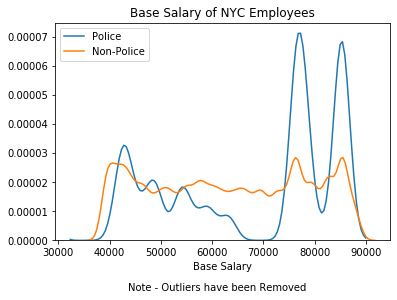

In [175]:
# Negative Values seem out of place. Since there are so many outliers / negative values,
# We will need to use quantiles / bound the data for distribution

# What are the distributions of Base Salary  like for Police Officers vs. Non Police Officers?
# These next statistics are summary for 2014-2019

# Regular Gross Paid Entries that are 0 from leave / cease employment are skewing visualizations
# To work with this, we will use quantiles to remove values < 1000 and remove values more than 85% percentile
x = payroll[payroll['Police Officer'] == True]['Base Salary']
y = x[x.between(x.quantile(.00), x.quantile(.85))]
sns.distplot(y, hist = False, label ='Police')
x = payroll[payroll['Police Officer'] == False]['Base Salary']
y = x[x.between(x.quantile(.50), x.quantile(.85))]
sns.distplot(y, hist = False, label = 'Non-Police')
plt.title('Base Salary of NYC Employees')
txt = 'Note - Outliers have been Removed'
plt.figtext(0.5, -.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

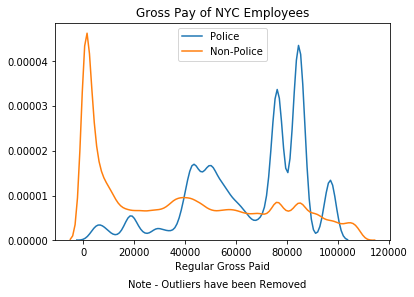

In [176]:
# Base Salary is 0 for many hourly workers, a better measure may be Regular Gross Paid

# Regular Gross Pay Distribution for Police/Non-Police
x = payroll[payroll['Police Officer'] == True]['Regular Gross Paid']
y = x[x.between(x.quantile(.05), x.quantile(.95))]
sns.distplot(y, hist = False, label ='Police')
x = payroll[payroll['Police Officer'] == False]['Regular Gross Paid']
y = x[x.between(x.quantile(.05), x.quantile(.95))]
sns.distplot(y, hist = False, label = 'Non-Police')
plt.title('Gross Pay of NYC Employees')
txt = 'Note - Outliers have been Removed'
plt.figtext(0.5, -.04, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

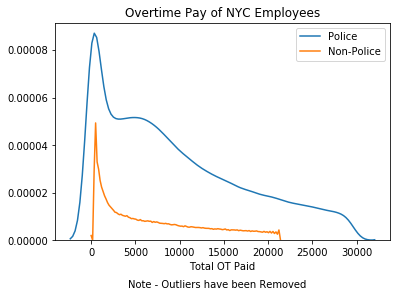

In [177]:
# Overtime Pay distribution for Police/Non Police
x = payroll[payroll['Police Officer'] == True]['Total OT Paid']
y = x[x.between(x.quantile(.05), x.quantile(.95))]
sns.distplot(y, hist = False, label ='Police')
x = payroll[payroll['Police Officer'] == False]['Total OT Paid']
y = x[x.between(x.quantile(.05), x.quantile(.95))]
sns.distplot(y, hist = False, label = 'Non-Police')
plt.title('Overtime Pay of NYC Employees')
txt = 'Note - Outliers have been Removed'
plt.figtext(0.5, -.04, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

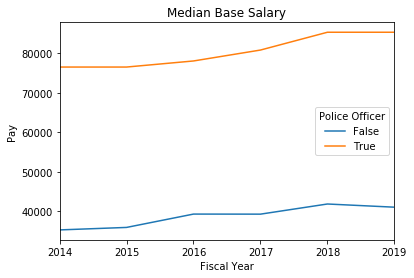

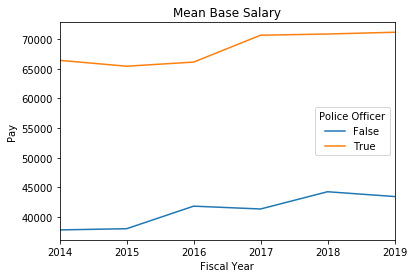

In [178]:
# What about pay related statistics over the last 4 years?
# Base Salary: Median and Mean
grouped_median = payroll.groupby(by = ['Fiscal Year', 'Police Officer']).median()['Base Salary']
grouped_median.unstack(level=1).plot(kind='line', subplots=False)
plt.ylabel('Pay')
plt.title('Median Base Salary')
plt.show()

grouped_mean = payroll.groupby(by = ['Fiscal Year', 'Police Officer']).mean()['Base Salary']
grouped_mean.unstack(level=1).plot(kind='line', subplots=False)
plt.ylabel('Pay')
plt.title('Mean Base Salary')
plt.show()

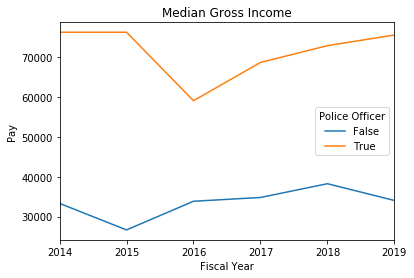

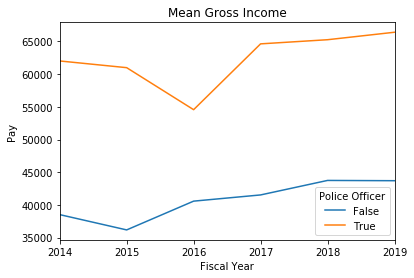

In [179]:
# Now, Total Gross Paid: Median and Mean
grouped_median = payroll.groupby(by = ['Fiscal Year', 'Police Officer']).median()['Regular Gross Paid']
grouped_median.unstack(level=1).plot(kind='line', subplots=False)
plt.ylabel('Pay')
plt.title('Median Gross Income')
plt.show()

grouped_mean = payroll.groupby(by = ['Fiscal Year', 'Police Officer']).mean()['Regular Gross Paid']
grouped_mean.unstack(level=1).plot(kind='line', subplots=False)
plt.ylabel('Pay')
plt.title('Mean Gross Income')
plt.show()

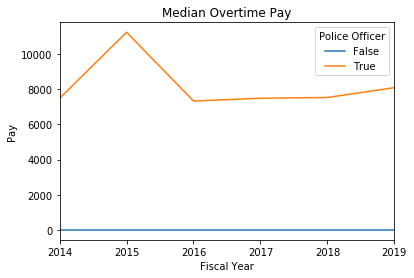

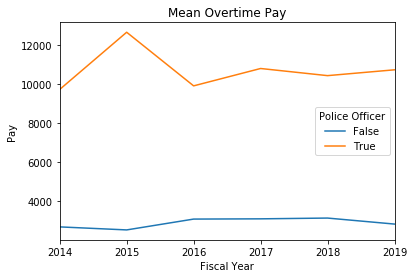

In [180]:
# Now, Overtime Pay: Median and Mean
grouped_median = payroll.groupby(by = ['Fiscal Year', 'Police Officer']).median()['Total OT Paid']
grouped_median.unstack(level=1).plot(kind='line', subplots=False)
plt.ylabel('Pay')
plt.title('Median Overtime Pay')
plt.show()

grouped_mean = payroll.groupby(by = ['Fiscal Year', 'Police Officer']).mean()['Total OT Paid']
grouped_mean.unstack(level=1).plot(kind='line', subplots=False)
plt.ylabel('Pay')
plt.title('Mean Overtime Pay')
plt.show()

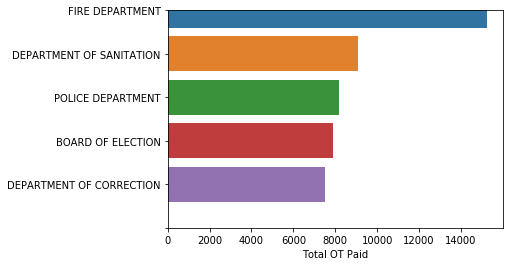

In [182]:
# Can't figure out why the graph is formatted so oddly
grouped_title_median = payroll[payroll['Fiscal Year'] == '2019'].groupby(by=['Agency Name']).median()
data = grouped_title_median['Total OT Paid'].sort_values(ascending = False)[:5].reset_index()
sns.barplot(x='Total OT Paid', y=[1,2,3,4,5], data = data, orient = 'h')
plt.yticks(list(range(6)),list(data['Agency Name']))
plt.show()

In [ ]:
# Next Steps: Visualize Medians / Means for OT + Regular Gross Paid